# PREDICTION USING UNSUPERVISED ML(TASK-2)
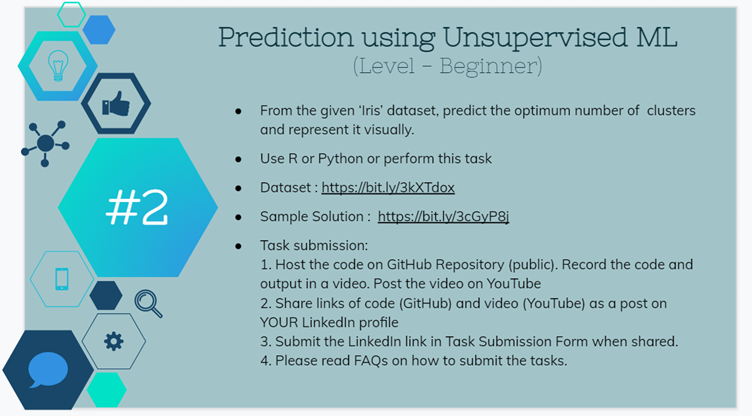

## BY DURGA MUKESH


### UNSUPERVISED ML:
##### Unsupervised learning enables you to discover patterns in the data that you were unaware existed - such as the presence of two major customer types. Clustering techniques such as k-means clustering can also provide the springboard for conducting further analysis after discrete groups have been discovered and this clustering technique is also the best example for unsupervised learning.

### CLUSTERING:
##### Clustering is a problem of learning to assign a label to examples by leveraging an unlabeled dataset. Because the dataset is completely unlabeled, deciding on whether the learned model is optimal is much more complicated than in supervised learning. 
##### Clustering analysis falls under both supervised learning and unsupervised learning. This is one of the helpful approach to analyze information to identify clusters of data that share similar attributes. Clustering can be applied to pattern recognition, fraud detection, and image processing. 

### K-MEANS CLUSTERING:
##### As a popular unsupervised learning algorithm, k-means clustering attempts to divide data into k discrete groups and is effective at uncovering basic data patterns.
##### The k-means clustering algorithm works by first splitting data into k number of clusters with k representing the number of clusters you wish to create. If you choose to split your dataset into three clusters then k is set to 3.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [2]:
#loading the dataset and reading data-set into data-frame
iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# Printing first 10 rows
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
# Printing first 5 rows
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
# checking for null values in dataframe
df.isnull().transpose()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sepal width (cm),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
petal length (cm),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
petal width (cm),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#to know the shape of data-set
df.shape

(150, 4)

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualisation of the dataset

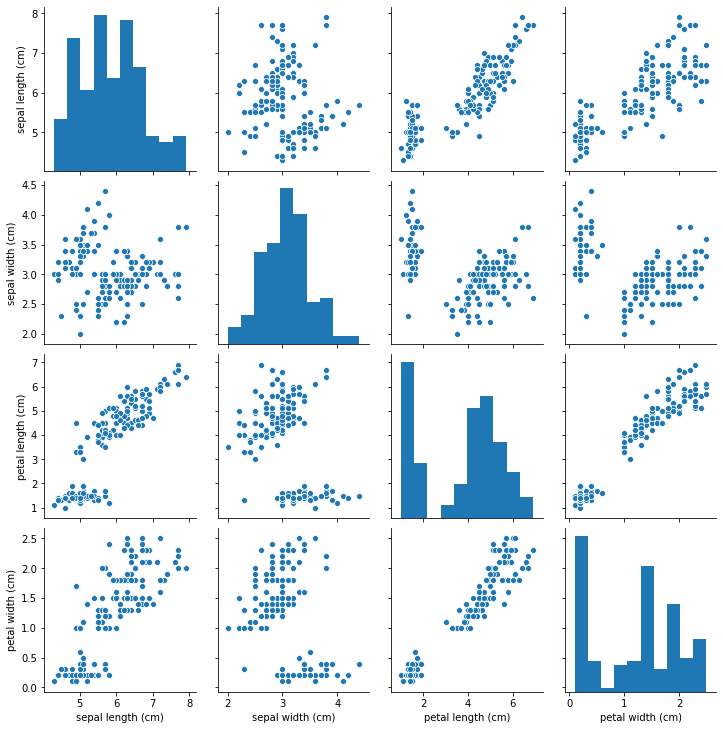

In [10]:
sns.pairplot(df)

# Using Elbow Method to find the number of clusters for K-Means

In [11]:
wcss = [] # within clusters sum of squares
for n in range(1,11):
    kmean=KMeans(n_clusters=n)
    kmean.fit(iris['data'])
    wcss.append(kmean.inertia_)

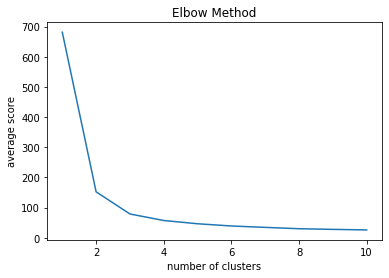

In [12]:
#Now plotiing the results on the line graph
from matplotlib import pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('average score')
plt.show()

### ***Inference:*** From the above graph, the elbow point is 3, and hence optimum number of cluster is 3.

# Applying K-Means Clustering:

In [13]:
#creation of k-means classifier
model = KMeans(n_clusters = 3)

#fitting the Iris Data
model.fit(iris['data'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
#prediction

df.target = model.labels_
data1 = df[df.target == 0]
data2 = df[df.target == 1]
data3 = df[df.target == 2]

C:\Users\mukesh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
#centroid
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

# Plotting Graph for Iris Dataset

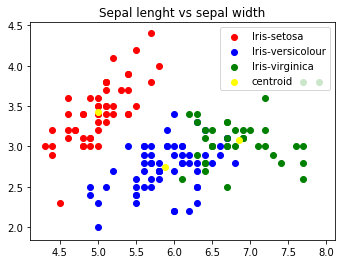

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(data1[['sepal length (cm)']], data1[['sepal width (cm)']], color = 'red', label = 'Iris-setosa')
plt.scatter(data2[['sepal length (cm)']], data2[['sepal width (cm)']], color = 'blue', label = 'Iris-versicolour')
plt.scatter(data3[['sepal length (cm)']], data3[['sepal width (cm)']], color = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, [0]], model.cluster_centers_[:,[1]], color = 'yellow', label = 'centroid')
plt.title('Sepal lenght vs sepal width')
plt.legend()

# ***THANK YOU***